In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt


# The path to our CSV file
file = "Resources/nashville-crash-data-deer.csv"

# Read our CSV data into pandas
df = pd.read_csv(file, parse_dates = ['Date and Time'])
#df.head()

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 25 columns):
Accident Number               2366 non-null int64
Date and Time                 2365 non-null datetime64[ns]
Number of Motor Vehicles      2364 non-null float64
Number of Injuries            2365 non-null float64
Number of Fatalities          2365 non-null float64
Property Damage               1034 non-null object
Hit and Run                   2366 non-null object
Reporting Officer             2365 non-null object
Collision Type Code           2365 non-null float64
Collision Type Description    2365 non-null object
Weather Code                  2365 non-null float64
Weather Description           2365 non-null object
Illumination Code             2360 non-null float64
Illumination Description      2360 non-null object
Harmful Code                  2366 non-null object
Harmful Code Description      2366 non-null object
Street Address                2366 non-null object
City         

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Code Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20160863376,2016-09-26 01:56:00,1.0,1.0,0.0,Y,N,212316,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,CULVERT;DEER (ANIMAL),BRICK CHURCH PKE & DRY CREEK RD,GOODLETTSVILLE,TN,37072.0,2125.0,MADISO,36.3280,-86.7648,"(36.328, -86.7648)"
1,20150533956,2015-06-05 23:37:00,1.0,1.0,0.0,Y,N,134898,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,CULVERT;DEER (ANIMAL);Ran Off Road-Right,GRANNY WHITE PIKE & CARL SEYFERT MEMORIA,NASHVILLE,TN,37220.0,7111.0,MIDTOW,36.0593,-86.8151,"(36.0593, -86.8151)"
2,20170737900,2017-08-19 23:55:00,1.0,0.0,0.0,Y,N,212325,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,CULVERT;DEER (ANIMAL);Ran Off Road-Right,UPLAND DR & ROSEBANK AV,NASHVILLE,TN,37216.0,1409.0,EAST,36.1982,-86.7065,"(36.1982, -86.7065)"
3,20180276556,2018-03-26 23:32:00,1.0,0.0,0.0,Y,N,212310,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,CULVERT;DITCH;DEER (ANIMAL),RAWLINGS RD & EATONS CREEK RD,JOELTON,TN,37080.0,3329.0,NORTH,36.3113,-86.8798,"(36.3113, -86.8798)"
4,20170438250,2017-05-18 00:43:00,1.0,1.0,0.0,Y,N,256499,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,CULVERT;TREE;DEER (ANIMAL),PRESTON RD & PETTUS RD,ANTIOCH,TN,37013.0,8763.0,SOUTH,36.0258,-86.6630,"(36.0258, -86.663)"


In [3]:
#Drop nan or blank only in date/time column
df['Date and Time'].dropna()

0      2016-09-26 01:56:00
1      2015-06-05 23:37:00
2      2017-08-19 23:55:00
3      2018-03-26 23:32:00
4      2017-05-18 00:43:00
5      2017-05-30 23:00:00
6      2018-03-20 23:48:00
7      2017-01-30 23:55:00
8      2009-11-06 20:20:00
9      2009-11-19 00:15:00
10     2009-11-29 01:40:00
11     2009-12-01 17:00:00
12     2009-12-02 19:18:00
13     2009-12-04 05:35:00
14     2009-12-04 19:07:00
15     2009-12-04 19:10:00
16     2009-12-09 06:30:00
17     2009-12-14 12:56:00
18     2009-12-14 20:49:00
19     2009-12-16 21:25:00
20     2009-12-20 20:40:00
21     2009-12-21 18:42:00
22     2009-12-24 09:40:00
23     2009-12-26 07:20:00
24     2009-12-27 17:49:00
25     2009-12-29 01:45:00
26     2010-01-03 03:20:00
27     2010-01-04 03:30:00
28     2010-01-06 17:42:00
29     2010-01-11 06:10:00
               ...        
2336   2019-06-01 03:05:00
2337   2016-11-18 00:38:00
2338   2010-06-06 15:41:00
2339   2017-02-25 06:44:00
2340   2017-12-21 01:30:00
2341   2016-05-25 00:50:00
2

In [4]:
#Remove any rows dated before 2010
#reduced_deer_df = df.loc(["Date and Time"] > pd.datetime(12/31/2009))
#reduced_df.count()
#reduced_deer_df.info()
#reduced_df.describe()

In [5]:
df['month_year'] = df['Date and Time'].dt.to_period('M')
df['Year'] = pd.DatetimeIndex(df['Date and Time']).year.astype(str)
df['Year'] = df['Year'].astype(str).replace('\.0', '', regex=True)
df['Month'] = pd.DatetimeIndex(df['Date and Time']).month.astype(str)
df['Month'] = df['Month'].astype(str).replace('\.0', '', regex=True)


In [6]:
deer_df = df[['Accident Number', 'Date and Time', 'month_year', 'Year', 'Month', 'Harmful Code', 'Weather Code', 'Street Address', 'ZIP',
                'Latitude', 'Longitude']]
#deer_df.set_index['Date and Time']
deer_df.info()
deer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 11 columns):
Accident Number    2366 non-null int64
Date and Time      2365 non-null datetime64[ns]
month_year         2365 non-null period[M]
Year               2366 non-null object
Month              2366 non-null object
Harmful Code       2366 non-null object
Weather Code       2365 non-null float64
Street Address     2366 non-null object
ZIP                2254 non-null float64
Latitude           2252 non-null float64
Longitude          2252 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4), period[M](1)
memory usage: 203.4+ KB


,Accident Number,Date and Time,month_year,Year,Month,Harmful Code,Weather Code,Street Address,ZIP,Latitude,Longitude
0,20160863376,2016-09-26 01:56:00,2016-09,2016,9,1;32;50,21.0,BRICK CHURCH PKE & DRY CREEK RD,37072.0,36.3280,-86.7648
1,20150533956,2015-06-05 23:37:00,2015-06,2015,6,32;50;63,21.0,GRANNY WHITE PIKE & CARL SEYFERT MEMORIA,37220.0,36.0593,-86.8151
2,20170737900,2017-08-19 23:55:00,2017-08,2017,8,32;50;63,21.0,UPLAND DR & ROSEBANK AV,37216.0,36.1982,-86.7065
3,20180276556,2018-03-26 23:32:00,2018-03,2018,3,32;34;50,22.0,RAWLINGS RD & EATONS CREEK RD,37080.0,36.3113,-86.8798
4,20170438250,2017-05-18 00:43:00,2017-05,2017,5,32;42;50,21.0,PRESTON RD & PETTUS RD,37013.0,36.0258,-86.6630


In [7]:
deer_mon_df = deer_df.groupby('Month')
accident_cnt = deer_mon_df['Accident Number'].count()
#accident_cnt

accident_cnt_df = pd.DataFrame({'Accident Count': accident_cnt})

accident_cnt_df.info()
accident_cnt_df.sort_values('Month')
accident_cnt_df.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to nan
Data columns (total 1 columns):
Accident Count    13 non-null int64
dtypes: int64(1)
memory usage: 208.0+ bytes


,Accident Count
Month,
1,184
10,321
11,596
12,216
2,132
3,129
4,134
5,157
6,194


[Text(0, 0.5, 'Number of Deer-related Accidents'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Deer-related collisions in Nashville, TN')]

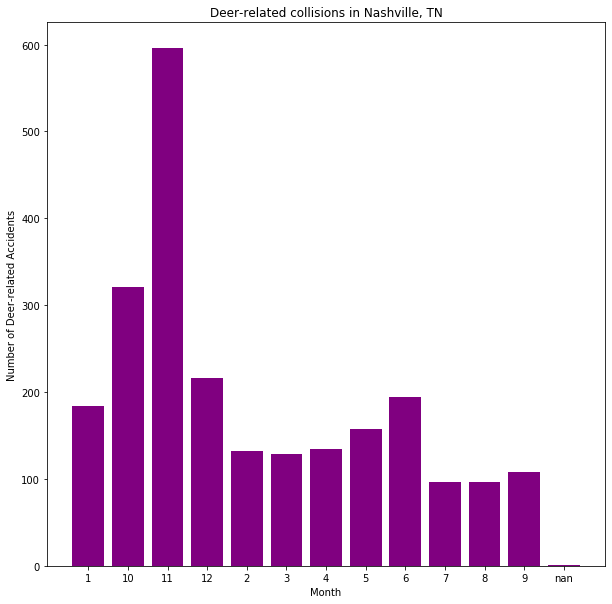

In [8]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(10, 10))

x_axis = accident_cnt_df.index.values

# Add the x-axis and the y-axis to the plot
plt.bar(x_axis, 
        accident_cnt_df['Accident Count'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel= "Month",
       ylabel= "Number of Deer-related Accidents",
       title= "Deer-related collisions in Nashville, TN")


In [9]:
deer_sumyr_df = deer_df.groupby('Year')
accident_cnt = deer_sumyr_df['Accident Number'].count()
#accident_cnt

accident_cntyr_df = pd.DataFrame({'Accident Count': accident_cnt})

accident_cntyr_df.info()
accident_cntyr_df.sort_values('Year')
accident_cntyr_df.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2009 to nan
Data columns (total 1 columns):
Accident Count    12 non-null int64
dtypes: int64(1)
memory usage: 192.0+ bytes


,Accident Count
Year,
2009,18
2010,188
2011,186
2012,238
2013,245
2014,232
2015,298
2016,286
2017,287


[Text(0, 0.5, 'Number of Deer-related Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Deer-related collisions in Nashville, TN')]

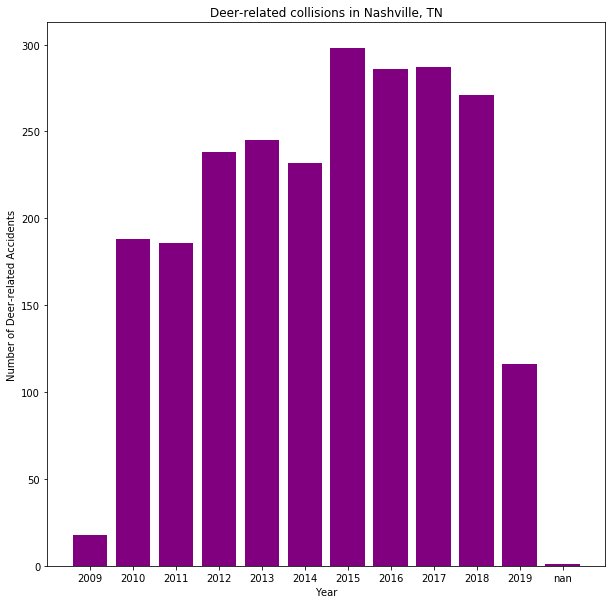

In [10]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(10, 10))

x_axis = accident_cntyr_df.index.values

# Add the x-axis and the y-axis to the plot
plt.bar(x_axis, 
        accident_cntyr_df['Accident Count'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel= "Year",
       ylabel= "Number of Deer-related Accidents",
       title= "Deer-related collisions in Nashville, TN")
